In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
transactions = pd.read_csv("data/transaction_data.csv")
transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0


In [3]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2595732 entries, 0 to 2595731
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   BASKET_ID          int64  
 2   DAY                int64  
 3   PRODUCT_ID         int64  
 4   QUANTITY           int64  
 5   SALES_VALUE        float64
 6   STORE_ID           int64  
 7   RETAIL_DISC        float64
 8   TRANS_TIME         int64  
 9   WEEK_NO            int64  
 10  COUPON_DISC        float64
 11  COUPON_MATCH_DISC  float64
dtypes: float64(4), int64(8)
memory usage: 237.6 MB


In [4]:
products = pd.read_csv("data/product.csv")
products.head()

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


In [5]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92353 entries, 0 to 92352
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   PRODUCT_ID            92353 non-null  int64 
 1   MANUFACTURER          92353 non-null  int64 
 2   DEPARTMENT            92353 non-null  object
 3   BRAND                 92353 non-null  object
 4   COMMODITY_DESC        92353 non-null  object
 5   SUB_COMMODITY_DESC    92353 non-null  object
 6   CURR_SIZE_OF_PRODUCT  92353 non-null  object
dtypes: int64(2), object(5)
memory usage: 4.9+ MB


In [6]:
#Append category information to transactions
transactions = pd.merge(transactions, products, how = "left", on = "PRODUCT_ID")
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2595732 entries, 0 to 2595731
Data columns (total 18 columns):
 #   Column                Dtype  
---  ------                -----  
 0   household_key         int64  
 1   BASKET_ID             int64  
 2   DAY                   int64  
 3   PRODUCT_ID            int64  
 4   QUANTITY              int64  
 5   SALES_VALUE           float64
 6   STORE_ID              int64  
 7   RETAIL_DISC           float64
 8   TRANS_TIME            int64  
 9   WEEK_NO               int64  
 10  COUPON_DISC           float64
 11  COUPON_MATCH_DISC     float64
 12  MANUFACTURER          int64  
 13  DEPARTMENT            object 
 14  BRAND                 object 
 15  COMMODITY_DESC        object 
 16  SUB_COMMODITY_DESC    object 
 17  CURR_SIZE_OF_PRODUCT  object 
dtypes: float64(4), int64(9), object(5)
memory usage: 376.3+ MB


In [7]:
transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0,2,PRODUCE,National,ONIONS,ONIONS SWEET (BULK&BAG),40 LB
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0,69,PRODUCE,Private,VEGETABLES - ALL OTHERS,CELERY,
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0,69,PRODUCE,Private,ORGANICS FRUIT & VEGETABLES,ORGANIC CARROTS,1 LB


In [8]:
transactions["COMMODITY_DESC"].value_counts()

SOFT DRINKS                     117532
FLUID MILK PRODUCTS              85630
BAKED BREAD/BUNS/ROLLS           83232
CHEESE                           74885
BAG SNACKS                       67190
                                 ...  
NDAIRY/TEAS/JUICE/SOD                2
MISCELLANEOUS(CORP USE ONLY)         1
EASTER LILY                          1
MISCELLANEOUS CROUTONS               1
FROZEN PACKAGE MEAT                  1
Name: COMMODITY_DESC, Length: 308, dtype: int64

In [9]:
#add column with first purchase per product per household
transactions["first_purchase"] = 0
transactions["first_purchase"].loc[transactions.groupby(["household_key", "PRODUCT_ID"]).DAY.idxmin()] = 1
transactions["first_purchase"].value_counts()

C:\Users\Gabriele\AppData\Local\Temp\ipykernel_14352\774500042.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions["first_purchase"].loc[transactions.groupby(["household_key", "PRODUCT_ID"]).DAY.idxmin()] = 1


1    1401469
0    1194263
Name: first_purchase, dtype: int64

In [11]:
yoghurt = transactions[transactions["COMMODITY_DESC"].isin( 
                         ["YOGURT"])]
yoghurt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44697 entries, 117 to 2595605
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   household_key         44697 non-null  int64  
 1   BASKET_ID             44697 non-null  int64  
 2   DAY                   44697 non-null  int64  
 3   PRODUCT_ID            44697 non-null  int64  
 4   QUANTITY              44697 non-null  int64  
 5   SALES_VALUE           44697 non-null  float64
 6   STORE_ID              44697 non-null  int64  
 7   RETAIL_DISC           44697 non-null  float64
 8   TRANS_TIME            44697 non-null  int64  
 9   WEEK_NO               44697 non-null  int64  
 10  COUPON_DISC           44697 non-null  float64
 11  COUPON_MATCH_DISC     44697 non-null  float64
 12  MANUFACTURER          44697 non-null  int64  
 13  DEPARTMENT            44697 non-null  object 
 14  BRAND                 44697 non-null  object 
 15  COMMODITY_DESC 

In [12]:
yoghurt["COMMODITY_DESC"].value_counts()

YOGURT    44697
Name: COMMODITY_DESC, dtype: int64

In [13]:
#calculate regular shelf price w/o discounts
yoghurt["shelf_price"] = (yoghurt["SALES_VALUE"] - yoghurt["RETAIL_DISC"] - yoghurt["COUPON_MATCH_DISC"]) / yoghurt["QUANTITY"]
#calculate paid shelf price with discounts
yoghurt["paid_price"] = (yoghurt["SALES_VALUE"] + yoghurt["COUPON_DISC"]) / yoghurt["QUANTITY"]
#calculate overall discount
yoghurt["pct_disc"] = (yoghurt["shelf_price"]-yoghurt["paid_price"]) / yoghurt["shelf_price"]
#calculate discount in percentage points versus regualar shelf price due to retailer loyalty card 
yoghurt["pct_retail_disc"] = (-yoghurt["RETAIL_DISC"] / yoghurt["QUANTITY"]) / yoghurt["shelf_price"]
#calculate discount in percentage points versus regualar shelf price due to manufacturer coupons 
yoghurt["pct_coupon_disc"] = ((-yoghurt["COUPON_DISC"]-yoghurt["COUPON_MATCH_DISC"]) / yoghurt["QUANTITY"] ) / yoghurt["shelf_price"]

C:\Users\Gabriele\AppData\Local\Temp\ipykernel_14352\1009804658.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yoghurt["shelf_price"] = (yoghurt["SALES_VALUE"] - yoghurt["RETAIL_DISC"] - yoghurt["COUPON_MATCH_DISC"]) / yoghurt["QUANTITY"]
C:\Users\Gabriele\AppData\Local\Temp\ipykernel_14352\1009804658.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yoghurt["paid_price"] = (yoghurt["SALES_VALUE"] + yoghurt["COUPON_DISC"]) / yoghurt["QUANTITY"]
C:\Users\Gabriele\AppData\Local\Temp\ipykernel_14352\100

In [14]:
pd.set_option('display.max_columns', None)
#soft_drinks[(soft_drinks["COUPON_MATCH_DISC"] < 0) & (soft_drinks["RETAIL_DISC"] == 0)].head()
#soft_drinks[soft_drinks["COUPON_MATCH_DISC"] < 0].head()
#soft_drinks[soft_drinks["RETAIL_DISC"] < 0].head()

<AxesSubplot:>

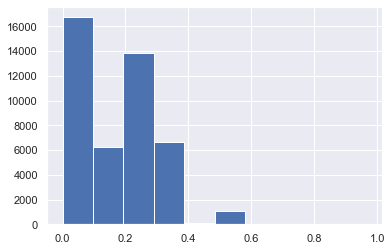

In [15]:
yoghurt["pct_retail_disc"].hist()

<AxesSubplot:>

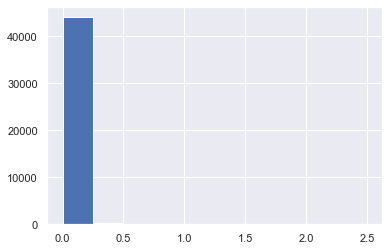

In [16]:
yoghurt["pct_coupon_disc"].hist()

<AxesSubplot:>

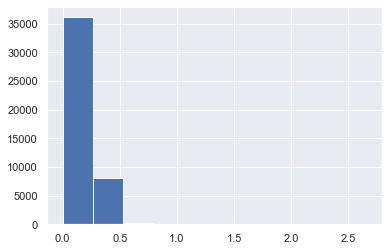

In [17]:
yoghurt["pct_disc"].hist()

In [18]:
yoghurt = yoghurt[yoghurt["shelf_price"] > 0]
yoghurt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44674 entries, 117 to 2595605
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   household_key         44674 non-null  int64  
 1   BASKET_ID             44674 non-null  int64  
 2   DAY                   44674 non-null  int64  
 3   PRODUCT_ID            44674 non-null  int64  
 4   QUANTITY              44674 non-null  int64  
 5   SALES_VALUE           44674 non-null  float64
 6   STORE_ID              44674 non-null  int64  
 7   RETAIL_DISC           44674 non-null  float64
 8   TRANS_TIME            44674 non-null  int64  
 9   WEEK_NO               44674 non-null  int64  
 10  COUPON_DISC           44674 non-null  float64
 11  COUPON_MATCH_DISC     44674 non-null  float64
 12  MANUFACTURER          44674 non-null  int64  
 13  DEPARTMENT            44674 non-null  object 
 14  BRAND                 44674 non-null  object 
 15  COMMODITY_DESC 

In [19]:
yoghurt = yoghurt[yoghurt["QUANTITY"] > 0]
yoghurt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44674 entries, 117 to 2595605
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   household_key         44674 non-null  int64  
 1   BASKET_ID             44674 non-null  int64  
 2   DAY                   44674 non-null  int64  
 3   PRODUCT_ID            44674 non-null  int64  
 4   QUANTITY              44674 non-null  int64  
 5   SALES_VALUE           44674 non-null  float64
 6   STORE_ID              44674 non-null  int64  
 7   RETAIL_DISC           44674 non-null  float64
 8   TRANS_TIME            44674 non-null  int64  
 9   WEEK_NO               44674 non-null  int64  
 10  COUPON_DISC           44674 non-null  float64
 11  COUPON_MATCH_DISC     44674 non-null  float64
 12  MANUFACTURER          44674 non-null  int64  
 13  DEPARTMENT            44674 non-null  object 
 14  BRAND                 44674 non-null  object 
 15  COMMODITY_DESC 

In [20]:
yoghurt = yoghurt[yoghurt["paid_price"] > 0]
yoghurt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44473 entries, 117 to 2595605
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   household_key         44473 non-null  int64  
 1   BASKET_ID             44473 non-null  int64  
 2   DAY                   44473 non-null  int64  
 3   PRODUCT_ID            44473 non-null  int64  
 4   QUANTITY              44473 non-null  int64  
 5   SALES_VALUE           44473 non-null  float64
 6   STORE_ID              44473 non-null  int64  
 7   RETAIL_DISC           44473 non-null  float64
 8   TRANS_TIME            44473 non-null  int64  
 9   WEEK_NO               44473 non-null  int64  
 10  COUPON_DISC           44473 non-null  float64
 11  COUPON_MATCH_DISC     44473 non-null  float64
 12  MANUFACTURER          44473 non-null  int64  
 13  DEPARTMENT            44473 non-null  object 
 14  BRAND                 44473 non-null  object 
 15  COMMODITY_DESC 

In [21]:
yoghurt.describe()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,MANUFACTURER,first_purchase,shelf_price,paid_price,pct_disc,pct_retail_disc,pct_coupon_disc
count,44473.000000,4.447300e+04,44473.000000,4.447300e+04,44473.000000,44473.000000,44473.000000,44473.000000,44473.000000,44473.000000,44473.000000,44473.000000,44473.000000,44473.000000,44473.000000,44473.000000,44473.000000,44473.000000,44473.000000
mean,1241.510962,3.392511e+10,385.147887,3.991566e+06,1.659344,1.331529,3496.235761,-0.305858,1598.257122,55.704158,-0.009676,-0.002340,770.151845,0.439525,1.162333,0.942612,0.165571,0.161451,0.004120
std,738.615563,4.670374e+09,188.672961,3.713583e+06,1.243865,1.111813,9431.363614,0.394837,386.584172,26.953179,0.098475,0.033305,627.014012,0.496335,1.090599,0.887612,0.146197,0.139494,0.040759
min,2.000000,2.698521e+10,1.000000,3.961300e+04,1.000000,0.070000,27.000000,-5.800000,0.000000,1.000000,-3.000000,-1.000000,69.000000,0.000000,0.200000,0.050000,0.000000,-0.000000,-0.000000
25%,604.000000,3.021729e+10,226.000000,9.153490e+05,1.000000,0.590000,334.000000,-0.390000,1329.000000,33.000000,0.000000,0.000000,69.000000,0.000000,0.400000,0.400000,0.000000,0.000000,0.000000
50%,1218.000000,3.267173e+10,382.000000,1.129671e+06,1.000000,0.800000,375.000000,-0.190000,1635.000000,55.000000,0.000000,0.000000,759.000000,0.000000,0.790000,0.600000,0.175000,0.175000,0.000000
75%,1903.000000,4.003739e+10,546.000000,5.587133e+06,2.000000,1.990000,424.000000,0.000000,1906.000000,79.000000,0.000000,0.000000,1487.000000,1.000000,0.850000,0.790000,0.240506,0.240506,0.000000
max,2500.000000,4.228992e+10,711.000000,1.797374e+07,22.000000,12.760000,34280.000000,0.000000,2359.000000,102.000000,0.000000,0.000000,5423.000000,1.000000,6.590000,6.590000,0.936709,0.911392,0.917431


<AxesSubplot:>

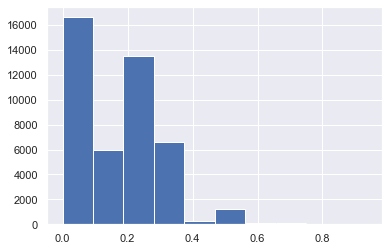

In [22]:
yoghurt["pct_disc"].hist()

<AxesSubplot:>

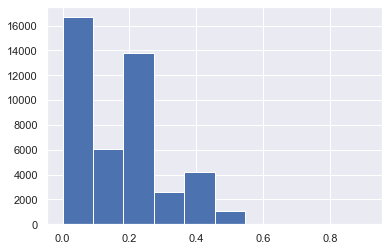

In [23]:
yoghurt["pct_retail_disc"].hist()

<AxesSubplot:>

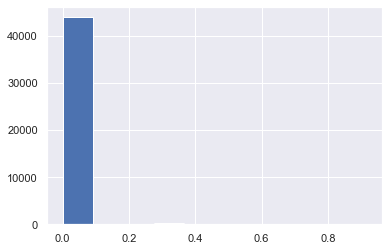

In [24]:
yoghurt["pct_coupon_disc"].hist()

In [25]:
#adding in causal data
causal = pd.read_parquet("data/causal_data.parquet")
causal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36786524 entries, 0 to 36786523
Data columns (total 5 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   PRODUCT_ID  int64 
 1   STORE_ID    int64 
 2   WEEK_NO     int64 
 3   display     object
 4   mailer      object
dtypes: int64(3), object(2)
memory usage: 1.4+ GB


In [26]:
causal_yoghurt = pd.merge(causal, products[["PRODUCT_ID", "COMMODITY_DESC"]], how = "left", on = "PRODUCT_ID")

In [27]:
causal_yoghurt = causal_yoghurt[causal_yoghurt.COMMODITY_DESC.isin(
    ["YOGURT"])]
causal_yoghurt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850982 entries, 473683 to 36779131
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   PRODUCT_ID      850982 non-null  int64 
 1   STORE_ID        850982 non-null  int64 
 2   WEEK_NO         850982 non-null  int64 
 3   display         850982 non-null  object
 4   mailer          850982 non-null  object
 5   COMMODITY_DESC  850982 non-null  object
dtypes: int64(3), object(3)
memory usage: 45.4+ MB


In [28]:
causal_yoghurt["COMMODITY_DESC"].value_counts()

YOGURT    850982
Name: COMMODITY_DESC, dtype: int64

In [29]:
yoghurt = pd.merge(yoghurt, causal_yoghurt, how = "left", on = ["PRODUCT_ID", "STORE_ID", "WEEK_NO"])
yoghurt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44474 entries, 0 to 44473
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   household_key         44474 non-null  int64  
 1   BASKET_ID             44474 non-null  int64  
 2   DAY                   44474 non-null  int64  
 3   PRODUCT_ID            44474 non-null  int64  
 4   QUANTITY              44474 non-null  int64  
 5   SALES_VALUE           44474 non-null  float64
 6   STORE_ID              44474 non-null  int64  
 7   RETAIL_DISC           44474 non-null  float64
 8   TRANS_TIME            44474 non-null  int64  
 9   WEEK_NO               44474 non-null  int64  
 10  COUPON_DISC           44474 non-null  float64
 11  COUPON_MATCH_DISC     44474 non-null  float64
 12  MANUFACTURER          44474 non-null  int64  
 13  DEPARTMENT            44474 non-null  object 
 14  BRAND                 44474 non-null  object 
 15  COMMODITY_DESC_x   

In [30]:
#remove duplicates
yoghurt.drop_duplicates(subset= ["household_key", "BASKET_ID", "STORE_ID", "DAY", "PRODUCT_ID"], keep = "last", inplace= True)
yoghurt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44473 entries, 0 to 44473
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   household_key         44473 non-null  int64  
 1   BASKET_ID             44473 non-null  int64  
 2   DAY                   44473 non-null  int64  
 3   PRODUCT_ID            44473 non-null  int64  
 4   QUANTITY              44473 non-null  int64  
 5   SALES_VALUE           44473 non-null  float64
 6   STORE_ID              44473 non-null  int64  
 7   RETAIL_DISC           44473 non-null  float64
 8   TRANS_TIME            44473 non-null  int64  
 9   WEEK_NO               44473 non-null  int64  
 10  COUPON_DISC           44473 non-null  float64
 11  COUPON_MATCH_DISC     44473 non-null  float64
 12  MANUFACTURER          44473 non-null  int64  
 13  DEPARTMENT            44473 non-null  object 
 14  BRAND                 44473 non-null  object 
 15  COMMODITY_DESC_x   

In [31]:
#dummy variables for display
dummies_display = pd.get_dummies(yoghurt["display"], prefix = "display")
yoghurt = pd.concat((yoghurt, dummies_display), axis = 1)
#dummy variables for mailer
dummies_mailer = pd.get_dummies(yoghurt["mailer"], prefix = "mailer")
yoghurt = pd.concat((yoghurt, dummies_mailer), axis = 1)

In [32]:
yoghurt.drop("COMMODITY_DESC_y", axis = 1, inplace = True)
yoghurt.rename(columns = {"COMMODITY_DESC_x" : "COMMODITY_DESC"}, inplace=True)
yoghurt.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,first_purchase,shelf_price,paid_price,pct_disc,pct_retail_disc,pct_coupon_disc,display,mailer,display_0,display_1,display_2,display_3,display_4,display_5,display_6,display_7,display_9,display_A,mailer_0,mailer_A,mailer_C,mailer_D,mailer_H,mailer_J
0,212,26985205886,1,5995158,1,2.0,288,-0.39,1341,1,0.0,0.0,759,GROCERY,National,YOGURT,YOGURT MULTI-PACKS,4OZ/4PK,1,2.39,2.0,0.163180,0.163180,-0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,718,26985360571,1,1035880,1,2.0,324,-0.29,1115,1,0.0,0.0,69,GROCERY,Private,YOGURT,YOGURT MULTI-PACKS,6 CT,1,2.29,2.0,0.126638,0.126638,-0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,293,27008831408,3,868548,1,2.5,296,-0.29,1501,1,0.0,0.0,1487,GROCERY,National,YOGURT,YOGURT MULTI-PACKS,18 OZ,1,2.79,2.5,0.103943,0.103943,-0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,293,27008832359,3,5582789,2,0.8,296,-0.38,1818,1,0.0,0.0,69,GROCERY,Private,YOGURT,YOGURT NOT MULTI-PACKS,6 OZ,1,0.59,0.4,0.322034,0.322034,-0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,293,27008832359,3,5584007,1,0.4,296,-0.19,1818,1,0.0,0.0,69,GROCERY,Private,YOGURT,YOGURT NOT MULTI-PACKS,6 OZ,1,0.59,0.4,0.322034,0.322034,-0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
yoghurt.describe()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,MANUFACTURER,first_purchase,shelf_price,paid_price,pct_disc,pct_retail_disc,pct_coupon_disc,display_0,display_1,display_2,display_3,display_4,display_5,display_6,display_7,display_9,display_A,mailer_0,mailer_A,mailer_C,mailer_D,mailer_H,mailer_J
count,44473.000000,4.447300e+04,44473.000000,4.447300e+04,44473.000000,44473.000000,44473.000000,44473.000000,44473.000000,44473.000000,44473.000000,44473.000000,44473.000000,44473.000000,44473.000000,44473.000000,44473.000000,44473.000000,44473.000000,44473.000000,44473.000000,44473.000000,44473.00000,44473.000000,44473.000000,44473.000000,44473.000000,44473.000000,44473.000000,44473.000000,44473.000000,44473.000000,44473.000000,44473.000000,44473.000000
mean,1241.510962,3.392511e+10,385.147887,3.991566e+06,1.659344,1.331529,3496.235761,-0.305858,1598.257122,55.704158,-0.009676,-0.002340,770.151845,0.439525,1.162333,0.942612,0.165571,0.161451,0.004120,0.192769,0.000517,0.011692,0.00706,0.000877,0.000630,0.003575,0.011333,0.003193,0.000809,0.018596,0.161604,0.000967,0.041801,0.006071,0.003418
std,738.615563,4.670374e+09,188.672961,3.713583e+06,1.243865,1.111813,9431.363614,0.394837,386.584172,26.953179,0.098475,0.033305,627.014012,0.496335,1.090599,0.887612,0.146197,0.139494,0.040759,0.394477,0.022736,0.107499,0.08373,0.029600,0.025084,0.059687,0.105852,0.056417,0.028440,0.135093,0.368091,0.031080,0.200136,0.077681,0.058363
min,2.000000,2.698521e+10,1.000000,3.961300e+04,1.000000,0.070000,27.000000,-5.800000,0.000000,1.000000,-3.000000,-1.000000,69.000000,0.000000,0.200000,0.050000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,604.000000,3.021729e+10,226.000000,9.153490e+05,1.000000,0.590000,334.000000,-0.390000,1329.000000,33.000000,0.000000,0.000000,69.000000,0.000000,0.400000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1218.000000,3.267173e+10,382.000000,1.129671e+06,1.000000,0.800000,375.000000,-0.190000,1635.000000,55.000000,0.000000,0.000000,759.000000,0.000000,0.790000,0.600000,0.175000,0.175000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1903.000000,4.003739e+10,546.000000,5.587133e+06,2.000000,1.990000,424.000000,0.000000,1906.000000,79.000000,0.000000,0.000000,1487.000000,1.000000,0.850000,0.790000,0.240506,0.240506,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2500.000000,4.228992e+10,711.000000,1.797374e+07,22.000000,12.760000,34280.000000,0.000000,2359.000000,102.000000,0.000000,0.000000,5423.000000,1.000000,6.590000,6.590000,0.936709,0.911392,0.917431,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
yoghurt["household_key"].nunique()

1776

In [35]:
hhdemogs = pd.read_csv("data/hh_demographic.csv")
hhdemogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   AGE_DESC             801 non-null    object
 1   MARITAL_STATUS_CODE  801 non-null    object
 2   INCOME_DESC          801 non-null    object
 3   HOMEOWNER_DESC       801 non-null    object
 4   HH_COMP_DESC         801 non-null    object
 5   HOUSEHOLD_SIZE_DESC  801 non-null    object
 6   KID_CATEGORY_DESC    801 non-null    object
 7   household_key        801 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 50.2+ KB


In [36]:
#addding household demographics
yoghurt = pd.merge(yoghurt, hhdemogs, how = "left", on="household_key")
yoghurt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44473 entries, 0 to 44472
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   household_key         44473 non-null  int64  
 1   BASKET_ID             44473 non-null  int64  
 2   DAY                   44473 non-null  int64  
 3   PRODUCT_ID            44473 non-null  int64  
 4   QUANTITY              44473 non-null  int64  
 5   SALES_VALUE           44473 non-null  float64
 6   STORE_ID              44473 non-null  int64  
 7   RETAIL_DISC           44473 non-null  float64
 8   TRANS_TIME            44473 non-null  int64  
 9   WEEK_NO               44473 non-null  int64  
 10  COUPON_DISC           44473 non-null  float64
 11  COUPON_MATCH_DISC     44473 non-null  float64
 12  MANUFACTURER          44473 non-null  int64  
 13  DEPARTMENT            44473 non-null  object 
 14  BRAND                 44473 non-null  object 
 15  COMMODITY_DESC     

In [37]:
yoghurt.describe(include="all")

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,first_purchase,shelf_price,paid_price,pct_disc,pct_retail_disc,pct_coupon_disc,display,mailer,display_0,display_1,display_2,display_3,display_4,display_5,display_6,display_7,display_9,display_A,mailer_0,mailer_A,mailer_C,mailer_D,mailer_H,mailer_J,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC
count,44473.000000,4.447300e+04,44473.000000,4.447300e+04,44473.000000,44473.000000,44473.000000,44473.000000,44473.000000,44473.000000,44473.000000,44473.000000,44473.000000,44473,44473,44473,44473,44473,44473.000000,44473.000000,44473.000000,44473.000000,44473.000000,44473.000000,10338,10338,44473.000000,44473.000000,44473.000000,44473.00000,44473.000000,44473.000000,44473.000000,44473.000000,44473.000000,44473.000000,44473.000000,44473.000000,44473.000000,44473.000000,44473.000000,44473.000000,26719,26719,26719,26719,26719,26719,26719
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,1,2,41,NaN,NaN,NaN,NaN,NaN,NaN,10,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,3,12,5,6,5,4
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GROCERY,National,YOGURT,YOGURT NOT MULTI-PACKS,6 OZ,NaN,NaN,NaN,NaN,NaN,NaN,0,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44473,28367,44473,36817,31544,NaN,NaN,NaN,NaN,NaN,NaN,8573,7187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9284,13150,5947,18406,8634,10205,17326
mean,1241.510962,3.392511e+10,385.147887,3.991566e+06,1.659344,1.331529,3496.235761,-0.305858,1598.257122,55.704158,-0.009676,-0.002340,770.151845,NaN,NaN,NaN,NaN,NaN,0.439525,1.162333,0.942612,0.165571,0.161451,0.004120,NaN,NaN,0.192769,0.000517,0.011692,0.00706,0.000877,0.000630,0.003575,0.011333,0.003193,0.000809,0.018596,0.161604,0.000967,0.041801,0.006071,0.003418,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,738.615563,4.670374e+09,188.672961,3.713583e+06,1.243865,1.111813,9431.363614,0.394837,386.584172,26.953179,0.098475,0.033305,627.014012,NaN,NaN,NaN,NaN,NaN,0.496335,1.090599,0.887612,0.146197,0.139494,0.040759,NaN,NaN,0.394477,0.022736,0.107499,0.08373,0.029600,0.025084,0.059687,0.105852,0.056417,0.028440,0.135093,0.368091,0.031080,0.200136,0.077681,0.058363,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.000000,2.698521e+10,1.000000,3.961300e+04,1.000000,0.070000,27.000000,-5.800000,0.000000,1.000000,-3.000000,-1.000000,69.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.200000,0.050000,0.000000,-0.000000,-0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,604.000000,3.021729e+10,226.000000,9.153490e+05,1.000000,0.590000,334.000000,-0.390000,1329.000000,33.000000,0.000000,0.000000,69.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.400000,0.400000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1218.000000,3.267173e+10,382.000000,1.129671e+06,1.000000,0.800000,375.000000,-0.190000,1635.000000,55.000000,0.000000,0.000000,759.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.790000,0.600000,0.175000,0.175000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1903.000000,4.003739e+10,546.000000,5.587133e+06,2.000000,1.990000,424.000000,0.000000,1906.000000,79.000000,0.000000,0.000000,1487.000000,NaN,NaN,NaN,NaN,NaN,1.000000,0.850000,0.790000,0.240506,0.240506,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0

In [38]:
#adding info about coupon redemption
coupon_redempt = pd.read_csv("data/coupon_redempt.csv")
coupon_redempt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   household_key  2318 non-null   int64
 1   DAY            2318 non-null   int64
 2   COUPON_UPC     2318 non-null   int64
 3   CAMPAIGN       2318 non-null   int64
dtypes: int64(4)
memory usage: 72.6 KB


In [39]:
coupon = pd.read_csv("data/coupon.csv")
coupon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124548 entries, 0 to 124547
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   COUPON_UPC  124548 non-null  int64
 1   PRODUCT_ID  124548 non-null  int64
 2   CAMPAIGN    124548 non-null  int64
dtypes: int64(3)
memory usage: 2.9 MB


In [40]:
couponr_prodid = pd.merge(coupon_redempt, coupon, how = "left", on = ["COUPON_UPC" , "CAMPAIGN"])
couponr_prodid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2198362 entries, 0 to 2198361
Data columns (total 5 columns):
 #   Column         Dtype
---  ------         -----
 0   household_key  int64
 1   DAY            int64
 2   COUPON_UPC     int64
 3   CAMPAIGN       int64
 4   PRODUCT_ID     int64
dtypes: int64(5)
memory usage: 100.6 MB


In [41]:
yoghurt = pd.merge(yoghurt, couponr_prodid, how = "left", on = ["household_key", "PRODUCT_ID", "DAY"])
yoghurt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44478 entries, 0 to 44477
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   household_key         44478 non-null  int64  
 1   BASKET_ID             44478 non-null  int64  
 2   DAY                   44478 non-null  int64  
 3   PRODUCT_ID            44478 non-null  int64  
 4   QUANTITY              44478 non-null  int64  
 5   SALES_VALUE           44478 non-null  float64
 6   STORE_ID              44478 non-null  int64  
 7   RETAIL_DISC           44478 non-null  float64
 8   TRANS_TIME            44478 non-null  int64  
 9   WEEK_NO               44478 non-null  int64  
 10  COUPON_DISC           44478 non-null  float64
 11  COUPON_MATCH_DISC     44478 non-null  float64
 12  MANUFACTURER          44478 non-null  int64  
 13  DEPARTMENT            44478 non-null  object 
 14  BRAND                 44478 non-null  object 
 15  COMMODITY_DESC     

In [42]:
#dummify household demogs
dummies_marital_status = pd.get_dummies(yoghurt["MARITAL_STATUS_CODE"], prefix = "marital_status")
dummies_homeowner = pd.get_dummies(yoghurt["HOMEOWNER_DESC"], prefix = "homeowner")
dummies_hhcomp = pd.get_dummies(yoghurt["HH_COMP_DESC"], prefix = "hhcomp")
dummies_kidcat = pd.get_dummies(yoghurt["KID_CATEGORY_DESC"], prefix = "kid_category")
yoghurt = pd.concat((yoghurt, dummies_marital_status), axis = 1)
yoghurt = pd.concat((yoghurt, dummies_homeowner), axis = 1)
yoghurt = pd.concat((yoghurt, dummies_hhcomp), axis = 1)
yoghurt = pd.concat((yoghurt, dummies_kidcat), axis = 1)
yoghurt.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,first_purchase,shelf_price,paid_price,pct_disc,pct_retail_disc,pct_coupon_disc,display,mailer,display_0,display_1,display_2,display_3,display_4,display_5,display_6,display_7,display_9,display_A,mailer_0,mailer_A,mailer_C,mailer_D,mailer_H,mailer_J,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,COUPON_UPC,CAMPAIGN,marital_status_A,marital_status_B,marital_status_U,homeowner_Homeowner,homeowner_Probable Owner,homeowner_Probable Renter,homeowner_Renter,homeowner_Unknown,hhcomp_1 Adult Kids,hhcomp_2 Adults Kids,hhcomp_2 Adults No Kids,hhcomp_Single Female,hhcomp_Single Male,hhcomp_Unknown,kid_category_1,kid_category_2,kid_category_3+,kid_category_None/Unknown
0,212,26985205886,1,5995158,1,2.0,288,-0.39,1341,1,0.0,0.0,759,GROCERY,National,YOGURT,YOGURT MULTI-PACKS,4OZ/4PK,1,2.39,2.0,0.163180,0.163180,-0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35-44,U,Under 15K,Unknown,Single Female,1,None/Unknown,NaN,NaN,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
1,718,26985360571,1,1035880,1,2.0,324,-0.29,1115,1,0.0,0.0,69,GROCERY,Private,YOGURT,YOGURT MULTI-PACKS,6 CT,1,2.29,2.0,0.126638,0.126638,-0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45-54,A,25-34K,Homeowner,2 Adults Kids,5+,3+,NaN,NaN,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,293,27008831408,3,868548,1,2.5,296,-0.29,1501,1,0.0,0.0,1487,GROCERY,National,YOGURT,YOGURT MULTI-PACKS,18 OZ,1,2.79,2.5,0.103943,0.103943,-0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,293,27008832359,3,5582789,2,0.8,296,-0.38,1818,1,0.0,0.0,69,GROCERY,Private,YOGURT,YOGURT NOT MULTI-PACKS,6 OZ,1,0.59,0.4,0.322034,0.322034,-0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,293,27008832359,3,5584007,1,0.4,296,-0.19,1818,1,0.0,0.0,69,GROCERY,Private,YOGURT,YOGURT NOT MULTI-PACKS,6 OZ,1,0.59,0.4,0.322034,0.322034,-0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
yoghurt["AGE_DESC"].value_counts()

45-54    9287
35-44    7510
25-34    5654
55-64    1764
65+      1437
19-24    1072
Name: AGE_DESC, dtype: int64

In [44]:
map_age = {"19-24":1, "25-34":2, "35-44":3, "45-54":4, "55-64":5, "65+":6}
yoghurt= yoghurt.assign(age_ordinal = yoghurt.AGE_DESC.map(map_age))

In [45]:
yoghurt.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,first_purchase,shelf_price,paid_price,pct_disc,pct_retail_disc,pct_coupon_disc,display,mailer,display_0,display_1,display_2,display_3,display_4,display_5,display_6,display_7,display_9,display_A,mailer_0,mailer_A,mailer_C,mailer_D,mailer_H,mailer_J,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,COUPON_UPC,CAMPAIGN,marital_status_A,marital_status_B,marital_status_U,homeowner_Homeowner,homeowner_Probable Owner,homeowner_Probable Renter,homeowner_Renter,homeowner_Unknown,hhcomp_1 Adult Kids,hhcomp_2 Adults Kids,hhcomp_2 Adults No Kids,hhcomp_Single Female,hhcomp_Single Male,hhcomp_Unknown,kid_category_1,kid_category_2,kid_category_3+,kid_category_None/Unknown,age_ordinal
0,212,26985205886,1,5995158,1,2.0,288,-0.39,1341,1,0.0,0.0,759,GROCERY,National,YOGURT,YOGURT MULTI-PACKS,4OZ/4PK,1,2.39,2.0,0.163180,0.163180,-0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35-44,U,Under 15K,Unknown,Single Female,1,None/Unknown,NaN,NaN,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,3.0
1,718,26985360571,1,1035880,1,2.0,324,-0.29,1115,1,0.0,0.0,69,GROCERY,Private,YOGURT,YOGURT MULTI-PACKS,6 CT,1,2.29,2.0,0.126638,0.126638,-0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45-54,A,25-34K,Homeowner,2 Adults Kids,5+,3+,NaN,NaN,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,4.0
2,293,27008831408,3,868548,1,2.5,296,-0.29,1501,1,0.0,0.0,1487,GROCERY,National,YOGURT,YOGURT MULTI-PACKS,18 OZ,1,2.79,2.5,0.103943,0.103943,-0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
3,293,27008832359,3,5582789,2,0.8,296,-0.38,1818,1,0.0,0.0,69,GROCERY,Private,YOGURT,YOGURT NOT MULTI-PACKS,6 OZ,1,0.59,0.4,0.322034,0.322034,-0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
4,293,27008832359,3,5584007,1,0.4,296,-0.19,1818,1,0.0,0.0,69,GROCERY,Private,YOGURT,YOGURT NOT MULTI-PACKS,6 OZ,1,0.59,0.4,0.322034,0.322034,-0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN


In [46]:
yoghurt["INCOME_DESC"].value_counts()

50-74K       5949
35-49K       4681
75-99K       3302
100-124K     2314
25-34K       2160
150-174K     2159
125-149K     2009
Under 15K    1475
15-24K       1453
175-199K      552
250K+         505
200-249K      165
Name: INCOME_DESC, dtype: int64

In [47]:
map_income = {"Under 15K":10, "15-24K":19.5, "25-34K":29.5, "35-49K":39.5, "50-74K":62, "75-99K":87, "100-124K":112, 
              "125-149K":137, "150-174K":162, "175-199K":187, "200-249K":224.5, "250K+":250}
yoghurt = yoghurt.assign(income_ordinal = yoghurt.INCOME_DESC.map(map_income))
yoghurt.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,first_purchase,shelf_price,paid_price,pct_disc,pct_retail_disc,pct_coupon_disc,display,mailer,display_0,display_1,display_2,display_3,display_4,display_5,display_6,display_7,display_9,display_A,mailer_0,mailer_A,mailer_C,mailer_D,mailer_H,mailer_J,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,COUPON_UPC,CAMPAIGN,marital_status_A,marital_status_B,marital_status_U,homeowner_Homeowner,homeowner_Probable Owner,homeowner_Probable Renter,homeowner_Renter,homeowner_Unknown,hhcomp_1 Adult Kids,hhcomp_2 Adults Kids,hhcomp_2 Adults No Kids,hhcomp_Single Female,hhcomp_Single Male,hhcomp_Unknown,kid_category_1,kid_category_2,kid_category_3+,kid_category_None/Unknown,age_ordinal,income_ordinal
0,212,26985205886,1,5995158,1,2.0,288,-0.39,1341,1,0.0,0.0,759,GROCERY,National,YOGURT,YOGURT MULTI-PACKS,4OZ/4PK,1,2.39,2.0,0.163180,0.163180,-0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35-44,U,Under 15K,Unknown,Single Female,1,None/Unknown,NaN,NaN,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,3.0,10.0
1,718,26985360571,1,1035880,1,2.0,324,-0.29,1115,1,0.0,0.0,69,GROCERY,Private,YOGURT,YOGURT MULTI-PACKS,6 CT,1,2.29,2.0,0.126638,0.126638,-0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45-54,A,25-34K,Homeowner,2 Adults Kids,5+,3+,NaN,NaN,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,4.0,29.5
2,293,27008831408,3,868548,1,2.5,296,-0.29,1501,1,0.0,0.0,1487,GROCERY,National,YOGURT,YOGURT MULTI-PACKS,18 OZ,1,2.79,2.5,0.103943,0.103943,-0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
3,293,27008832359,3,5582789,2,0.8,296,-0.38,1818,1,0.0,0.0,69,GROCERY,Private,YOGURT,YOGURT NOT MULTI-PACKS,6 OZ,1,0.59,0.4,0.322034,0.322034,-0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
4,293,27008832359,3,5584007,1,0.4,296,-0.19,1818,1,0.0,0.0,69,GROCERY,Private,YOGURT,YOGURT NOT MULTI-PACKS,6 OZ,1,0.59,0.4,0.322034,0.322034,-0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN


In [48]:
yoghurt["HOUSEHOLD_SIZE_DESC"].value_counts()

2     10210
1      7522
3      4152
5+     2592
4      2248
Name: HOUSEHOLD_SIZE_DESC, dtype: int64

In [49]:
map_hhsize = {"1":1, "2":2, "3":3, "4":4, "5+":5}
yoghurt = yoghurt.assign(hhsize_ordinal = yoghurt.HOUSEHOLD_SIZE_DESC.map(map_hhsize))
yoghurt.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,first_purchase,shelf_price,paid_price,pct_disc,pct_retail_disc,pct_coupon_disc,display,mailer,display_0,display_1,display_2,display_3,display_4,display_5,display_6,display_7,display_9,display_A,mailer_0,mailer_A,mailer_C,mailer_D,mailer_H,mailer_J,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,COUPON_UPC,CAMPAIGN,marital_status_A,marital_status_B,marital_status_U,homeowner_Homeowner,homeowner_Probable Owner,homeowner_Probable Renter,homeowner_Renter,homeowner_Unknown,hhcomp_1 Adult Kids,hhcomp_2 Adults Kids,hhcomp_2 Adults No Kids,hhcomp_Single Female,hhcomp_Single Male,hhcomp_Unknown,kid_category_1,kid_category_2,kid_category_3+,kid_category_None/Unknown,age_ordinal,income_ordinal,hhsize_ordinal
0,212,26985205886,1,5995158,1,2.0,288,-0.39,1341,1,0.0,0.0,759,GROCERY,National,YOGURT,YOGURT MULTI-PACKS,4OZ/4PK,1,2.39,2.0,0.163180,0.163180,-0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35-44,U,Under 15K,Unknown,Single Female,1,None/Unknown,NaN,NaN,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,3.0,10.0,1.0
1,718,26985360571,1,1035880,1,2.0,324,-0.29,1115,1,0.0,0.0,69,GROCERY,Private,YOGURT,YOGURT MULTI-PACKS,6 CT,1,2.29,2.0,0.126638,0.126638,-0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45-54,A,25-34K,Homeowner,2 Adults Kids,5+,3+,NaN,NaN,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,4.0,29.5,5.0
2,293,27008831408,3,868548,1,2.5,296,-0.29,1501,1,0.0,0.0,1487,GROCERY,National,YOGURT,YOGURT MULTI-PACKS,18 OZ,1,2.79,2.5,0.103943,0.103943,-0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
3,293,27008832359,3,5582789,2,0.8,296,-0.38,1818,1,0.0,0.0,69,GROCERY,Private,YOGURT,YOGURT NOT MULTI-PACKS,6 OZ,1,0.59,0.4,0.322034,0.322034,-0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,293,27008832359,3,5584007,1,0.4,296,-0.19,1818,1,0.0,0.0,69,GROCERY,Private,YOGURT,YOGURT NOT MULTI-PACKS,6 OZ,1,0.59,0.4,0.322034,0.322034,-0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


In [50]:
yoghurt.describe()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,MANUFACTURER,first_purchase,shelf_price,paid_price,pct_disc,pct_retail_disc,pct_coupon_disc,display_0,display_1,display_2,display_3,display_4,display_5,display_6,display_7,display_9,display_A,mailer_0,mailer_A,mailer_C,mailer_D,mailer_H,mailer_J,COUPON_UPC,CAMPAIGN,marital_status_A,marital_status_B,marital_status_U,homeowner_Homeowner,homeowner_Probable Owner,homeowner_Probable Renter,homeowner_Renter,homeowner_Unknown,hhcomp_1 Adult Kids,hhcomp_2 Adults Kids,hhcomp_2 Adults No Kids,hhcomp_Single Female,hhcomp_Single Male,hhcomp_Unknown,kid_category_1,kid_category_2,kid_category_3+,kid_category_None/Unknown,age_ordinal,income_ordinal,hhsize_ordinal
count,44478.000000,4.447800e+04,44478.000000,4.447800e+04,44478.000000,44478.000000,44478.000000,44478.000000,44478.000000,44478.000000,44478.000000,44478.000000,44478.000000,44478.000000,44478.000000,44478.000000,44478.000000,44478.000000,44478.000000,44478.000000,44478.000000,44478.000000,44478.000000,44478.000000,44478.000000,44478.000000,44478.000000,44478.000000,44478.000000,44478.000000,44478.000000,44478.000000,44478.000000,44478.000000,44478.000000,1.370000e+02,137.000000,44478.000000,44478.000000,44478.000000,44478.000000,44478.000000,44478.000000,44478.000000,44478.000000,44478.000000,44478.000000,44478.000000,44478.000000,44478.000000,44478.000000,44478.000000,44478.000000,44478.000000,44478.000000,26724.000000,26724.000000,26724.000000
mean,1241.405436,3.392557e+10,385.164149,3.991771e+06,1.659517,1.331553,3495.881559,-0.305903,1598.283961,55.706507,-0.009706,-0.002371,770.232430,0.439476,1.162291,0.942556,0.165601,0.161466,0.004136,0.192792,0.000517,0.011691,0.007060,0.000877,0.000630,0.003575,0.011331,0.003193,0.000809,0.018593,0.161586,0.000967,0.041841,0.006070,0.003417,2.900868e+10,12.656934,0.295719,0.073924,0.231193,0.413935,0.009083,0.003350,0.022595,0.151873,0.035321,0.174333,0.194231,0.087639,0.074172,0.035141,0.094496,0.056432,0.060255,0.389653,3.349050,78.524566,2.333109
std,738.641207,4.670384e+09,188.668692,3.713947e+06,1.244180,1.111825,9430.892662,0.394869,386.570751,26.952592,0.098588,0.033657,627.024829,0.496329,1.090545,0.887579,0.146233,0.139495,0.040827,0.394496,0.022734,0.107493,0.083726,0.029599,0.025083,0.059683,0.105846,0.056413,0.028439,0.135086,0.368074,0.031078,0.200228,0.077677,0.058359,2.295892e+10,4.773453,0.456371,0.261650,0.421600,0.492543,0.094873,0.057783,0.148612,0.358902,0.184592,0.379400,0.395612,0.282772,0.262053,0.184138,0.292521,0.230757,0.237960,0.487677,1.160058,53.166392,1.239085
min,2.000000,2.698521e+10,1.000000,3.961300e+04,1.000000,0.070000,27.000000,-5.800000,0.000000,1.000000,-3.000000,-1.000000,69.000000,0.000000,0.200000,0.050000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000009e+10,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,10.000000,1.000000
25%,604.000000,3.021731e+10,226.000000,9.153490e+05,1.000000,0.590000,334.000000,-0.390000,1329.000000,33.000000,0.000000,0.000000,69.000000,0.000000,0.400000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000009e+10,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,39.500000,1.000000
50%,1218.000000,3.267173e+10,382.000000,1.129671e+06,1.000000,0.800000,375.000000,-0.190000,1635.000000,55.000000,0.000000,0.000000,759.000000,0.000000,0.790000,0.600000,0.175000,0.175000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

In [51]:
yoghurt.to_csv("data/yoghurt.csv")

In [52]:
yoghurt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44478 entries, 0 to 44477
Data columns (total 72 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   household_key              44478 non-null  int64  
 1   BASKET_ID                  44478 non-null  int64  
 2   DAY                        44478 non-null  int64  
 3   PRODUCT_ID                 44478 non-null  int64  
 4   QUANTITY                   44478 non-null  int64  
 5   SALES_VALUE                44478 non-null  float64
 6   STORE_ID                   44478 non-null  int64  
 7   RETAIL_DISC                44478 non-null  float64
 8   TRANS_TIME                 44478 non-null  int64  
 9   WEEK_NO                    44478 non-null  int64  
 10  COUPON_DISC                44478 non-null  float64
 11  COUPON_MATCH_DISC          44478 non-null  float64
 12  MANUFACTURER               44478 non-null  int64  
 13  DEPARTMENT                 44478 non-null  obj

In [53]:
campaign_desc = pd.read_csv("data/campaign_desc.csv")
coupon = pd.read_csv("data/coupon.csv")
campaign_table = pd.read_csv("data/campaign_table.csv")
products = pd.read_csv("data/product.csv")

In [54]:
campaign_desc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   DESCRIPTION  30 non-null     object
 1   CAMPAIGN     30 non-null     int64 
 2   START_DAY    30 non-null     int64 
 3   END_DAY      30 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.1+ KB


In [55]:
coupon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124548 entries, 0 to 124547
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   COUPON_UPC  124548 non-null  int64
 1   PRODUCT_ID  124548 non-null  int64
 2   CAMPAIGN    124548 non-null  int64
dtypes: int64(3)
memory usage: 2.9 MB


In [56]:
campaign_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7208 entries, 0 to 7207
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   DESCRIPTION    7208 non-null   object
 1   household_key  7208 non-null   int64 
 2   CAMPAIGN       7208 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 169.1+ KB


In [57]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92353 entries, 0 to 92352
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   PRODUCT_ID            92353 non-null  int64 
 1   MANUFACTURER          92353 non-null  int64 
 2   DEPARTMENT            92353 non-null  object
 3   BRAND                 92353 non-null  object
 4   COMMODITY_DESC        92353 non-null  object
 5   SUB_COMMODITY_DESC    92353 non-null  object
 6   CURR_SIZE_OF_PRODUCT  92353 non-null  object
dtypes: int64(2), object(5)
memory usage: 4.9+ MB


In [58]:
products = products[products["COMMODITY_DESC"].isin( 
                         ["YOGURT"])]
products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 686 entries, 385 to 92010
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   PRODUCT_ID            686 non-null    int64 
 1   MANUFACTURER          686 non-null    int64 
 2   DEPARTMENT            686 non-null    object
 3   BRAND                 686 non-null    object
 4   COMMODITY_DESC        686 non-null    object
 5   SUB_COMMODITY_DESC    686 non-null    object
 6   CURR_SIZE_OF_PRODUCT  686 non-null    object
dtypes: int64(2), object(5)
memory usage: 42.9+ KB


In [59]:
products["COMMODITY_DESC"].value_counts()

YOGURT    686
Name: COMMODITY_DESC, dtype: int64

In [60]:
campaign_data = pd.merge(products, coupon, how = "left", on = "PRODUCT_ID")
campaign_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2462 entries, 0 to 2461
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PRODUCT_ID            2462 non-null   int64  
 1   MANUFACTURER          2462 non-null   int64  
 2   DEPARTMENT            2462 non-null   object 
 3   BRAND                 2462 non-null   object 
 4   COMMODITY_DESC        2462 non-null   object 
 5   SUB_COMMODITY_DESC    2462 non-null   object 
 6   CURR_SIZE_OF_PRODUCT  2462 non-null   object 
 7   COUPON_UPC            2460 non-null   float64
 8   CAMPAIGN              2460 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 192.3+ KB


In [61]:
pd.set_option("display.max_columns" , None)
campaign_data.head()

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,COUPON_UPC,CAMPAIGN
0,39613,69,GROCERY,Private,YOGURT,YOGURT NOT MULTI-PACKS,32 OZ,1.000009e+10,8.0
1,39613,69,GROCERY,Private,YOGURT,YOGURT NOT MULTI-PACKS,32 OZ,1.000009e+10,13.0
2,39613,69,GROCERY,Private,YOGURT,YOGURT NOT MULTI-PACKS,32 OZ,1.000009e+10,18.0
3,44032,69,GROCERY,Private,YOGURT,YOGURT NOT MULTI-PACKS,32 OZ,1.000009e+10,8.0
4,44032,69,GROCERY,Private,YOGURT,YOGURT NOT MULTI-PACKS,32 OZ,1.000009e+10,13.0


In [62]:
campaign_data["COUPON_UPC"].nunique()

10

In [63]:
campaign_data["COUPON_UPC"].describe()

count    2.460000e+03
mean     1.876519e+10
std      1.816847e+10
min      1.000009e+10
25%      1.000009e+10
50%      1.000009e+10
75%      1.000009e+10
max      5.704709e+10
Name: COUPON_UPC, dtype: float64

In [64]:
campaign_data = pd.merge(campaign_data, campaign_desc, how = "left", on = "CAMPAIGN")
campaign_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2462 entries, 0 to 2461
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PRODUCT_ID            2462 non-null   int64  
 1   MANUFACTURER          2462 non-null   int64  
 2   DEPARTMENT            2462 non-null   object 
 3   BRAND                 2462 non-null   object 
 4   COMMODITY_DESC        2462 non-null   object 
 5   SUB_COMMODITY_DESC    2462 non-null   object 
 6   CURR_SIZE_OF_PRODUCT  2462 non-null   object 
 7   COUPON_UPC            2460 non-null   float64
 8   CAMPAIGN              2460 non-null   float64
 9   DESCRIPTION           2460 non-null   object 
 10  START_DAY             2460 non-null   float64
 11  END_DAY               2460 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 250.0+ KB


In [65]:
campaign_data.head()

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,COUPON_UPC,CAMPAIGN,DESCRIPTION,START_DAY,END_DAY
0,39613,69,GROCERY,Private,YOGURT,YOGURT NOT MULTI-PACKS,32 OZ,1.000009e+10,8.0,TypeA,412.0,460.0
1,39613,69,GROCERY,Private,YOGURT,YOGURT NOT MULTI-PACKS,32 OZ,1.000009e+10,13.0,TypeA,504.0,551.0
2,39613,69,GROCERY,Private,YOGURT,YOGURT NOT MULTI-PACKS,32 OZ,1.000009e+10,18.0,TypeA,587.0,642.0
3,44032,69,GROCERY,Private,YOGURT,YOGURT NOT MULTI-PACKS,32 OZ,1.000009e+10,8.0,TypeA,412.0,460.0
4,44032,69,GROCERY,Private,YOGURT,YOGURT NOT MULTI-PACKS,32 OZ,1.000009e+10,13.0,TypeA,504.0,551.0


In [66]:
campaign_data = pd.merge(campaign_data, campaign_table, how = "left", on = "CAMPAIGN")
campaign_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2456320 entries, 0 to 2456319
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   PRODUCT_ID            int64  
 1   MANUFACTURER          int64  
 2   DEPARTMENT            object 
 3   BRAND                 object 
 4   COMMODITY_DESC        object 
 5   SUB_COMMODITY_DESC    object 
 6   CURR_SIZE_OF_PRODUCT  object 
 7   COUPON_UPC            float64
 8   CAMPAIGN              float64
 9   DESCRIPTION_x         object 
 10  START_DAY             float64
 11  END_DAY               float64
 12  DESCRIPTION_y         object 
 13  household_key         float64
dtypes: float64(5), int64(2), object(7)
memory usage: 281.1+ MB


In [67]:
campaign_data.drop("DESCRIPTION_y", axis = 1, inplace = True)

In [68]:
campaign_data.rename(columns = {"DESCRIPTION_x" : "DESCRIPTION"}, inplace = True)

In [69]:
campaign_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2456320 entries, 0 to 2456319
Data columns (total 13 columns):
 #   Column                Dtype  
---  ------                -----  
 0   PRODUCT_ID            int64  
 1   MANUFACTURER          int64  
 2   DEPARTMENT            object 
 3   BRAND                 object 
 4   COMMODITY_DESC        object 
 5   SUB_COMMODITY_DESC    object 
 6   CURR_SIZE_OF_PRODUCT  object 
 7   COUPON_UPC            float64
 8   CAMPAIGN              float64
 9   DESCRIPTION           object 
 10  START_DAY             float64
 11  END_DAY               float64
 12  household_key         float64
dtypes: float64(5), int64(2), object(6)
memory usage: 262.4+ MB


In [70]:
campaign_data["COUPON_UPC"].describe()

count    2.456318e+06
mean     1.512570e+10
std      1.458891e+10
min      1.000009e+10
25%      1.000009e+10
50%      1.000009e+10
75%      1.000009e+10
max      5.704709e+10
Name: COUPON_UPC, dtype: float64

In [71]:
campaign_data = campaign_data[campaign_data["COUPON_UPC"] > 0]
campaign_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2456318 entries, 0 to 2456319
Data columns (total 13 columns):
 #   Column                Dtype  
---  ------                -----  
 0   PRODUCT_ID            int64  
 1   MANUFACTURER          int64  
 2   DEPARTMENT            object 
 3   BRAND                 object 
 4   COMMODITY_DESC        object 
 5   SUB_COMMODITY_DESC    object 
 6   CURR_SIZE_OF_PRODUCT  object 
 7   COUPON_UPC            float64
 8   CAMPAIGN              float64
 9   DESCRIPTION           object 
 10  START_DAY             float64
 11  END_DAY               float64
 12  household_key         float64
dtypes: float64(5), int64(2), object(6)
memory usage: 262.4+ MB


In [72]:
yoghurt = yoghurt[yoghurt.age_ordinal > 0]
yoghurt.describe()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,MANUFACTURER,first_purchase,shelf_price,paid_price,pct_disc,pct_retail_disc,pct_coupon_disc,display_0,display_1,display_2,display_3,display_4,display_5,display_6,display_7,display_9,display_A,mailer_0,mailer_A,mailer_C,mailer_D,mailer_H,mailer_J,COUPON_UPC,CAMPAIGN,marital_status_A,marital_status_B,marital_status_U,homeowner_Homeowner,homeowner_Probable Owner,homeowner_Probable Renter,homeowner_Renter,homeowner_Unknown,hhcomp_1 Adult Kids,hhcomp_2 Adults Kids,hhcomp_2 Adults No Kids,hhcomp_Single Female,hhcomp_Single Male,hhcomp_Unknown,kid_category_1,kid_category_2,kid_category_3+,kid_category_None/Unknown,age_ordinal,income_ordinal,hhsize_ordinal
count,26724.000000,2.672400e+04,26724.000000,2.672400e+04,26724.000000,26724.000000,26724.000000,26724.000000,26724.000000,26724.000000,26724.000000,26724.000000,26724.000000,26724.000000,26724.000000,26724.000000,26724.000000,26724.000000,26724.000000,26724.000000,26724.000000,26724.000000,26724.000000,26724.000000,26724.000000,26724.000000,26724.000000,26724.000000,26724.000000,26724.000000,26724.000000,26724.000000,26724.000000,26724.000000,26724.000000,1.210000e+02,121.000000,26724.000000,26724.000000,26724.000000,26724.000000,26724.000000,26724.000000,26724.000000,26724.000000,26724.000000,26724.000000,26724.000000,26724.000000,26724.000000,26724.000000,26724.000000,26724.000000,26724.000000,26724.000000,26724.000000,26724.000000,26724.000000
mean,1245.041760,3.403365e+10,391.236941,4.055253e+06,1.695517,1.341906,3824.635833,-0.298256,1582.400726,56.571471,-0.010813,-0.002812,752.146572,0.377414,1.155321,0.939510,0.160036,0.155395,0.004641,0.189717,0.000449,0.010403,0.007521,0.000861,0.000486,0.004490,0.011151,0.003779,0.000486,0.019009,0.159781,0.000973,0.038841,0.006548,0.004191,2.924524e+10,12.768595,0.492179,0.123035,0.384785,0.688931,0.015117,0.005576,0.037607,0.252769,0.058786,0.290151,0.323267,0.145861,0.123447,0.058487,0.157274,0.093923,0.100284,0.648518,3.349050,78.524566,2.333109
std,737.162842,4.610004e+09,184.244291,3.700818e+06,1.311600,1.116463,9875.183192,0.393177,381.397293,26.316780,0.103024,0.036681,627.076277,0.484749,1.098500,0.889417,0.145899,0.138221,0.043030,0.392085,0.021186,0.101463,0.086400,0.029325,0.022051,0.066861,0.105010,0.061361,0.022051,0.136559,0.366410,0.031177,0.193221,0.080658,0.064603,2.304107e+10,4.723629,0.499948,0.328484,0.486554,0.462940,0.122023,0.074462,0.190247,0.434608,0.235228,0.453840,0.467733,0.352974,0.328956,0.234666,0.364066,0.291727,0.300384,0.477442,1.160058,53.166392,1.239085
min,7.000000,2.698521e+10,1.000000,4.403200e+04,1.000000,0.330000,27.000000,-5.800000,0.000000,1.000000,-3.000000,-1.000000,69.000000,0.000000,0.350000,0.090000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000009e+10,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,10.000000,1.000000
25%,605.000000,3.062838e+10,242.000000,9.153490e+05,1.000000,0.600000,338.000000,-0.380000,1322.000000,35.000000,0.000000,0.000000,69.000000,0.000000,0.400000,0.400000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000009e+10,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,39.500000,1.000000
50%,1197.000000,3.276000e+10,389.000000,1.132036e+06,1.000000,0.800000,381.000000,-0.190000,1625.000000,56.000000,0.000000,0.000000,759.000000,0.000000,0.790000,0.600000,0.163180,0.163180,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

In [73]:
#remove first 30 weeks
yoghurt.drop(yoghurt[yoghurt.WEEK_NO < 30].index, inplace = True)
yoghurt.describe()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,MANUFACTURER,first_purchase,shelf_price,paid_price,pct_disc,pct_retail_disc,pct_coupon_disc,display_0,display_1,display_2,display_3,display_4,display_5,display_6,display_7,display_9,display_A,mailer_0,mailer_A,mailer_C,mailer_D,mailer_H,mailer_J,COUPON_UPC,CAMPAIGN,marital_status_A,marital_status_B,marital_status_U,homeowner_Homeowner,homeowner_Probable Owner,homeowner_Probable Renter,homeowner_Renter,homeowner_Unknown,hhcomp_1 Adult Kids,hhcomp_2 Adults Kids,hhcomp_2 Adults No Kids,hhcomp_Single Female,hhcomp_Single Male,hhcomp_Unknown,kid_category_1,kid_category_2,kid_category_3+,kid_category_None/Unknown,age_ordinal,income_ordinal,hhsize_ordinal
count,21546.000000,2.154600e+04,21546.000000,2.154600e+04,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000,1.210000e+02,121.000000,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000,21546.000000
mean,1245.452567,3.533129e+10,454.564745,4.193100e+06,1.702543,1.348681,3928.644064,-0.294917,1575.264922,65.618073,-0.011563,-0.002989,758.044927,0.339181,1.157084,0.943367,0.158301,0.153297,0.005005,0.191126,0.000557,0.011046,0.007612,0.001067,0.000603,0.005430,0.011928,0.003991,0.000511,0.020004,0.151165,0.001207,0.048176,0.008122,0.005198,2.924524e+10,12.768595,0.488118,0.125453,0.386429,0.684675,0.015455,0.005105,0.037919,0.256846,0.061636,0.294069,0.313376,0.149355,0.123225,0.058340,0.159426,0.097419,0.101782,0.641372,3.345633,78.144226,2.344240
std,734.623389,4.190060e+09,144.490170,3.856389e+06,1.340699,1.130282,10015.556999,0.392618,380.893160,20.636354,0.106577,0.037571,635.092796,0.473442,1.104938,0.899216,0.145736,0.137366,0.044713,0.393197,0.023594,0.104521,0.086914,0.032656,0.024557,0.073492,0.108564,0.063053,0.022590,0.140016,0.358218,0.034718,0.214143,0.089758,0.071912,2.304107e+10,4.723629,0.499870,0.331239,0.486942,0.464656,0.123358,0.071271,0.191005,0.436904,0.240498,0.455633,0.463877,0.356446,0.328703,0.234391,0.366082,0.296535,0.302369,0.479609,1.169447,52.740014,1.247132
min,7.000000,3.001771e+10,202.000000,4.403200e+04,1.000000,0.330000,27.000000,-5.800000,1.000000,30.000000,-3.000000,-1.000000,69.000000,0.000000,0.350000,0.100000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000009e+10,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,10.000000,1.000000
25%,605.000000,3.194460e+10,334.000000,9.153490e+05,1.000000,0.600000,339.000000,-0.380000,1319.000000,48.000000,0.000000,0.000000,69.000000,0.000000,0.400000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000009e+10,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,39.500000,1.000000
50%,1179.000000,3.365542e+10,446.000000,5.578494e+06,1.000000,0.800000,381.000000,-0.190000,1620.000000,64.000000,0.000000,0.000000,759.000000,0.000000,0.790000,0.600000,0.166667,0.163180,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [74]:
yoghurt_wcamp = pd.merge(yoghurt, campaign_data, how = "left", on = ["household_key", "PRODUCT_ID"])
yoghurt_wcamp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61291 entries, 0 to 61290
Data columns (total 83 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   household_key              61291 non-null  int64  
 1   BASKET_ID                  61291 non-null  int64  
 2   DAY                        61291 non-null  int64  
 3   PRODUCT_ID                 61291 non-null  int64  
 4   QUANTITY                   61291 non-null  int64  
 5   SALES_VALUE                61291 non-null  float64
 6   STORE_ID                   61291 non-null  int64  
 7   RETAIL_DISC                61291 non-null  float64
 8   TRANS_TIME                 61291 non-null  int64  
 9   WEEK_NO                    61291 non-null  int64  
 10  COUPON_DISC                61291 non-null  float64
 11  COUPON_MATCH_DISC          61291 non-null  float64
 12  MANUFACTURER_x             61291 non-null  int64  
 13  DEPARTMENT_x               61291 non-null  obj

In [75]:
yoghurt_wcamp["CAMPAIGN_y"] = np.where((yoghurt_wcamp["START_DAY"] <= yoghurt_wcamp["DAY"]) & 
                                           (yoghurt_wcamp["DAY"] <= yoghurt_wcamp["END_DAY"]), 
                                           yoghurt_wcamp["CAMPAIGN_y"], np.NaN)
yoghurt_wcamp["DESCRIPTION"] = np.where((yoghurt_wcamp["START_DAY"] <= yoghurt_wcamp["DAY"]) & 
                                           (yoghurt_wcamp["DAY"] <= yoghurt_wcamp["END_DAY"]), 
                                           yoghurt_wcamp["DESCRIPTION"], np.NaN)

In [76]:
yoghurt_wcamp["DESCRIPTION"] = np.where((yoghurt_wcamp["START_DAY"] <= yoghurt_wcamp["DAY"]) & 
                                           (yoghurt_wcamp["DAY"] <= yoghurt_wcamp["END_DAY"]), 
                                           yoghurt_wcamp["DESCRIPTION"], np.NaN)

In [77]:
yoghurt_wcamp.drop(labels = ["MANUFACTURER_y", "DEPARTMENT_y", "BRAND_y", "COMMODITY_DESC_y", "SUB_COMMODITY_DESC_y", 
                                 "CURR_SIZE_OF_PRODUCT_y"], 
                       axis = 1, inplace = True)

In [78]:
yoghurt_wcamp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61291 entries, 0 to 61290
Data columns (total 77 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   household_key              61291 non-null  int64  
 1   BASKET_ID                  61291 non-null  int64  
 2   DAY                        61291 non-null  int64  
 3   PRODUCT_ID                 61291 non-null  int64  
 4   QUANTITY                   61291 non-null  int64  
 5   SALES_VALUE                61291 non-null  float64
 6   STORE_ID                   61291 non-null  int64  
 7   RETAIL_DISC                61291 non-null  float64
 8   TRANS_TIME                 61291 non-null  int64  
 9   WEEK_NO                    61291 non-null  int64  
 10  COUPON_DISC                61291 non-null  float64
 11  COUPON_MATCH_DISC          61291 non-null  float64
 12  MANUFACTURER_x             61291 non-null  int64  
 13  DEPARTMENT_x               61291 non-null  obj

In [79]:
yoghurt_wcamp.sort_values(by = ["household_key", "PRODUCT_ID", "BASKET_ID", "CAMPAIGN_y"], inplace = True)
yoghurt_wcamp.drop_duplicates(subset = ["household_key", "PRODUCT_ID", "BASKET_ID"], keep = "first", inplace = True)
yoghurt_wcamp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21541 entries, 24662 to 43425
Data columns (total 77 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   household_key              21541 non-null  int64  
 1   BASKET_ID                  21541 non-null  int64  
 2   DAY                        21541 non-null  int64  
 3   PRODUCT_ID                 21541 non-null  int64  
 4   QUANTITY                   21541 non-null  int64  
 5   SALES_VALUE                21541 non-null  float64
 6   STORE_ID                   21541 non-null  int64  
 7   RETAIL_DISC                21541 non-null  float64
 8   TRANS_TIME                 21541 non-null  int64  
 9   WEEK_NO                    21541 non-null  int64  
 10  COUPON_DISC                21541 non-null  float64
 11  COUPON_MATCH_DISC          21541 non-null  float64
 12  MANUFACTURER_x             21541 non-null  int64  
 13  DEPARTMENT_x               21541 non-null 

In [80]:
yoghurt_wcamp.to_csv("data/yoghurt_wcamp.csv")

In [81]:
#dummify campaign and description of campaign
yoghurt_wcamp = pd.read_csv("data/yoghurt_wcamp.csv")
dummies_campaign_y = pd.get_dummies(yoghurt_wcamp["CAMPAIGN_y"], prefix = "campaign_y")
dummies_description = pd.get_dummies(yoghurt_wcamp["DESCRIPTION"], prefix = "description")
yoghurt_wcamp = pd.concat((yoghurt_wcamp, dummies_campaign_y), axis = 1)
yoghurt_wcamp = pd.concat((yoghurt_wcamp, dummies_description), axis = 1)
yoghurt_wcamp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21541 entries, 0 to 21540
Data columns (total 87 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 21541 non-null  int64  
 1   household_key              21541 non-null  int64  
 2   BASKET_ID                  21541 non-null  int64  
 3   DAY                        21541 non-null  int64  
 4   PRODUCT_ID                 21541 non-null  int64  
 5   QUANTITY                   21541 non-null  int64  
 6   SALES_VALUE                21541 non-null  float64
 7   STORE_ID                   21541 non-null  int64  
 8   RETAIL_DISC                21541 non-null  float64
 9   TRANS_TIME                 21541 non-null  int64  
 10  WEEK_NO                    21541 non-null  int64  
 11  COUPON_DISC                21541 non-null  float64
 12  COUPON_MATCH_DISC          21541 non-null  float64
 13  MANUFACTURER_x             21541 non-null  int

In [82]:
yoghurt_wcamp.to_csv("data/yoghurt_wcamp.csv")